# Vanilla NN & MLP

# 1.  Linear Layer

In [17]:
import torch
import torch.nn as nn

input_dimension = 5
output_dimension = 3

""" initialize a linear layer = initialize weights(hyperparameters) for the linear layer
"""
linear_layer = nn.Linear(input_dimension,output_dimension)

print(linear_layer.weight)
print(linear_layer.bias)

""" modify the weight and bias in linear layer 
"""
with torch.no_grad():
    linear_layer.weight[0,0]=0
    linear_layer.weight[0,1]=1
    linear_layer.weight[0,2]=2
    print(linear_layer.weight.data)

# OR (coding test1 qns 8)

# Initialize the weight matrices
linear_layer.weight.data.fill_(1.0)
# Initialize the biases
linear_layer.bias.data.fill_(0.5)


print(linear_layer.weight)
print(linear_layer.bias)


""" Compute linear layer 
"""
x = torch.rand(input_dimension)
y = linear_layer(x)

print(x.size(), y.size())


Parameter containing:
tensor([[ 0.3950, -0.1735,  0.0810, -0.1386,  0.4441],
        [-0.1807,  0.3634,  0.2658,  0.4104, -0.3758],
        [ 0.3731,  0.0005,  0.1566,  0.0676, -0.0070]], requires_grad=True)
Parameter containing:
tensor([-0.3481,  0.0419,  0.4329], requires_grad=True)
tensor([[ 0.0000e+00,  1.0000e+00,  2.0000e+00, -1.3864e-01,  4.4415e-01],
        [-1.8068e-01,  3.6335e-01,  2.6575e-01,  4.1041e-01, -3.7578e-01],
        [ 3.7312e-01,  5.4437e-04,  1.5662e-01,  6.7616e-02, -7.0125e-03]])
Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)
Parameter containing:
tensor([0.5000, 0.5000, 0.5000], requires_grad=True)
torch.Size([5]) torch.Size([3])


# 2. Softmax

![quiz1 qns 3](./pic/quiz1_3.png)

In [34]:
""" quiz1 qns 3
"""
input_dimension = 2
output_dimension = 3
""" initialize a linear layer = initialize weights(hyperparameters) for the linear layer
"""
linear_layer = nn.Linear(input_dimension,output_dimension, bias=False)

print(linear_layer.weight)
linear_layer.weight.data = torch.Tensor([[1,1],
                                        [2,0],
                                        [1,0]])
print(linear_layer.weight)

x = torch.Tensor([2,1])
A = linear_layer(x)

torch.softmax(A , dim=0)

Parameter containing:
tensor([[-0.6786, -0.1916],
        [-0.2442,  0.2401],
        [-0.5029, -0.4463]], requires_grad=True)
Parameter containing:
tensor([[1., 1.],
        [2., 0.],
        [1., 0.]], requires_grad=True)


tensor([0.2447, 0.6652, 0.0900], grad_fn=<SoftmaxBackward>)

# 3. Compute Gradient (quiz1 qns 6)
![quiz1 qns 6](./pic/quiz1_6.png)


In [61]:
X = torch.Tensor([[1,1],[0,0.5]])
y = torch.Tensor([[0,1]])
w = torch.Tensor([[1,0]])

torch.mm((torch.mm(w, X) - y), X.T) + w

tensor([[2., 0.]])

# 4. Compute Mean Cross-Entropy Loss (quiz1 qns 5)
![quiz1 qns 5](./pic/quiz1_5.png)

In [99]:
X = torch.Tensor([[2,1,1],[-1,0,-1],[1,0,0]])
W = torch.Tensor([[1,2,0],[1,1,2],[-1,2,1]])
y = torch.LongTensor([1,2,0])

mycrit=nn.CrossEntropyLoss()

print(torch.mm(W,X))
# torch.max(torch.mm(W,X), dim=0).values.view(1,-1)
# print(torch.argmax(torch.mm(W,X), dim=0).view(1,-1))
mycrit(torch.mm(W,X).T, y)


tensor([[ 0.,  1., -1.],
        [ 3.,  1.,  0.],
        [-3., -1., -3.]])


tensor(1.3862)

# MLP dimension

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

In [7]:
class three_layer_net(nn.Module):

    # def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
    def __init__(self, input_size,output_size):
        super(three_layer_net , self).__init__()
        self.layer1 = nn.Linear(  input_size   , output_size  , bias=False  )
        # self.layer1 = nn.Linear(  input_size   , hidden_size1  , bias=False  )
        # self.layer2 = nn.Linear(  hidden_size1 , hidden_size2  , bias=False  )
        # self.layer3 = nn.Linear(  hidden_size2 , output_size   , bias=False  )
        
    def forward(self, x):
        
        y       = self.layer1(x)
        scores  = torch.relu(y)
        # y_hat   = torch.relu(y)
        # z       = self.layer2(y_hat)
        # z_hat   = torch.relu(z)
        # scores  = self.layer3(z_hat)
        
        return scores

In [17]:
net=three_layer_net(3, 3)
print(net)

three_layer_net(
  (layer1): Linear(in_features=3, out_features=3, bias=False)
)


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

In [22]:
# Set dL/dU, dL/dV, dL/dW to be filled with zeros
optimizer.zero_grad()
    
inputs =  torch.Tensor([[2,1,1],[-1,0,-1],[1,0,0]]).view(3,3)
# print(inputs)
label = torch.Tensor([1,2,0])#.view(3,1)

with torch.no_grad():
    net.layer1.weight.data = torch.Tensor([[1,2,0],[1,2,3],[-1,2,1]])

# tell Pytorch to start tracking all operations that will be done on "inputs"
inputs.requires_grad_()


# forward the minibatch through the net  
scores=net( inputs ) 
print(scores)

# Compute the average of the losses of the data points in the minibatch
loss = criterion( scores , label) 

# backward pass to compute dL/dU, dL/dV and dL/dW    
loss.backward()

# do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
optimizer.step()

tensor([[4., 7., 1.],
        [0., 0., 0.],
        [1., 1., 0.]], grad_fn=<ReluBackward0>)


RuntimeError: expected scalar type Long but found Float

# Convolution dimension calculator

## https://madebyollin.github.io/convnet-calculator/

* 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initialize parameters
def initialize_parameters(layers_dims):
    np.random.seed(1)               
    parameters = {}
    L = len(layers_dims)            

    for l in range(1, L):           
        parameters["W" + str(l)] = np.random.randn(
            layers_dims[l], layers_dims[l - 1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))

        assert parameters["W" + str(l)].shape == (
            layers_dims[l], layers_dims[l - 1])
        assert parameters["b" + str(l)].shape == (layers_dims[l], 1)

    return parameters

# Define activation functions that will be used in forward propagation
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z


def tanh(Z):
    A = np.tanh(Z)
    return A, Z


def relu(Z):
    A = np.maximum(0, Z)
    return A, Z


def leaky_relu(Z):
    A = np.maximum(0.1 * Z, Z)

    return A, Z

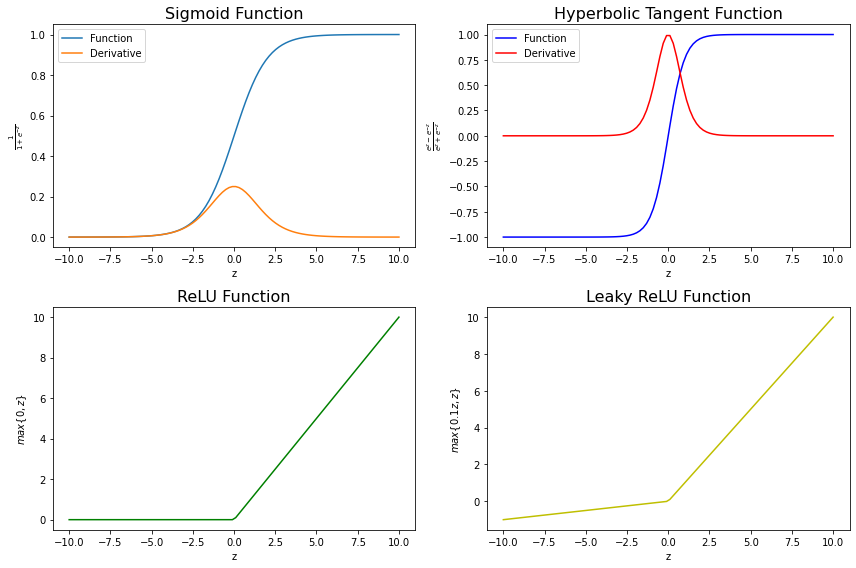

In [2]:
# Plot the 4 activation functions
z = np.linspace(-10, 10, 100)

# Computes post-activation outputs
A_sigmoid, z = sigmoid(z)
A_tanh, z = tanh(z)
A_relu, z = relu(z)
A_leaky_relu, z = leaky_relu(z)

# Plot sigmoid
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(z, A_sigmoid, label = "Function")
plt.plot(z, A_sigmoid * (1 - A_sigmoid), label = "Derivative")
plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{1 + e^{-z}}$")
plt.title("Sigmoid Function", fontsize = 16)
# Plot tanh
plt.subplot(2, 2, 2)
plt.plot(z, A_tanh, 'b', label = "Function")
plt.plot(z, 1 - np.square(A_tanh), 'r',label = "Derivative")
plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{e^z - e^{-z}}{e^z + e^{-z}}$")
plt.title("Hyperbolic Tangent Function", fontsize = 16)
# plot relu
plt.subplot(2, 2, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize = 16)
# plot leaky relu
plt.subplot(2, 2, 4)
plt.plot(z, A_leaky_relu, 'y')
plt.xlabel("z")
plt.ylabel(r"$max\{0.1z, z\}$")
plt.title("Leaky ReLU Function", fontsize = 16)
plt.tight_layout();

# Feed Forward

In [3]:
# Define helper functions that will be used in L-model forward prop
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)

    return Z, cache


def linear_activation_forward(A_prev, W, b, activation_fn):
    assert activation_fn == "sigmoid" or activation_fn == "tanh" or \
        activation_fn == "relu"

    if activation_fn == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation_fn == "tanh":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)

    elif activation_fn == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert A.shape == (W.shape[0], A_prev.shape[1])

    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, parameters, hidden_layers_activation_fn="relu"):
    A = X                           
    caches = []                     
    L = len(parameters) // 2        

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(
            A_prev, parameters["W" + str(l)], parameters["b" + str(l)],
            activation_fn=hidden_layers_activation_fn)
        caches.append(cache)

    AL, cache = linear_activation_forward(
        A, parameters["W" + str(L)], parameters["b" + str(L)],
        activation_fn="sigmoid")
    caches.append(cache)

    assert AL.shape == (1, X.shape[1])

    return AL, caches

# Cost

In [4]:
# Compute cross-entropy cost
def compute_cost(AL, y):
    m = y.shape[1]              
    cost = - (1 / m) * np.sum(
        np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))

    return cost

# Back-Propagation

In [5]:
# Define derivative of activation functions w.r.t z that will be used in back-propagation
def sigmoid_gradient(dA, Z):
    A, Z = sigmoid(Z)
    dZ = dA * A * (1 - A)

    return dZ


def tanh_gradient(dA, Z):
    A, Z = tanh(Z)
    dZ = dA * (1 - np.square(A))

    return dZ


def relu_gradient(dA, Z):
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ


# define helper functions that will be used in L-model back-prop
def linear_backword(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert dA_prev.shape == A_prev.shape
    assert dW.shape == W.shape
    assert db.shape == b.shape

    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation_fn):
    linear_cache, activation_cache = cache

    if activation_fn == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "tanh":
        dZ = tanh_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    return dA_prev, dW, db


def L_model_backward(AL, y, caches, hidden_layers_activation_fn="relu"):
    y = y.reshape(AL.shape)
    L = len(caches)
    grads = {}

    dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads[
        "db" + str(L)] = linear_activation_backward(
            dAL, caches[L - 1], "sigmoid")

    for l in range(L - 1, 0, -1):
        current_cache = caches[l - 1]
        grads["dA" + str(l - 1)], grads["dW" + str(l)], grads[
            "db" + str(l)] = linear_activation_backward(
                grads["dA" + str(l)], current_cache,
                hidden_layers_activation_fn)

    return grads


# define the function to update both weight matrices and bias vectors
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * grads["db" + str(l)]

    return parameters